# Load Dataset

In [10]:
import pandas as pd
datahousepricing = pd.read_csv("D:/SEMESTER 4/Komstat II/kc_house_data.csv")

In [16]:
datahousepricing.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Uji Asumsi

In [17]:
dellist=['id','date']
datafix=datahousepricing.drop(dellist, axis=1)
datafix

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 19 columns]

Untuk melakukan analisis regresi linear diperlukan asumsi-asumsi yang perlu
dipenuhi. Uji asumsi yang dilakukan antara lain:
## Asumsi Variabel Dependen bersifat Kontinu
Asumsi ini terpenuhi karena variabel **Price** merupakan suatu variabel kontinu. Price merupakan variabel yang dapat mengambil nilai dalam rentang yang tak terbatas atau berkelanjutan. Dalam konteks Price, nilai Price dapat bervariasi dalam rentang yang tak terbatas, mulai dari nilai terendah hingga nilai tertinggi yang mungkin, tanpa adanya batasan diskrit.

## Asumsi Linearitas Variabel Independen dengan Variabel Dependen
Uji asumsi linearitas dapat dilakukan dengan melihat scatter plot kemudian melihat koefisien korelasi antara variabel dependen dengan setiap variabel independen.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
y = datafix["price"]
price = ["price"]
X = datafix.drop(price, axis=1)

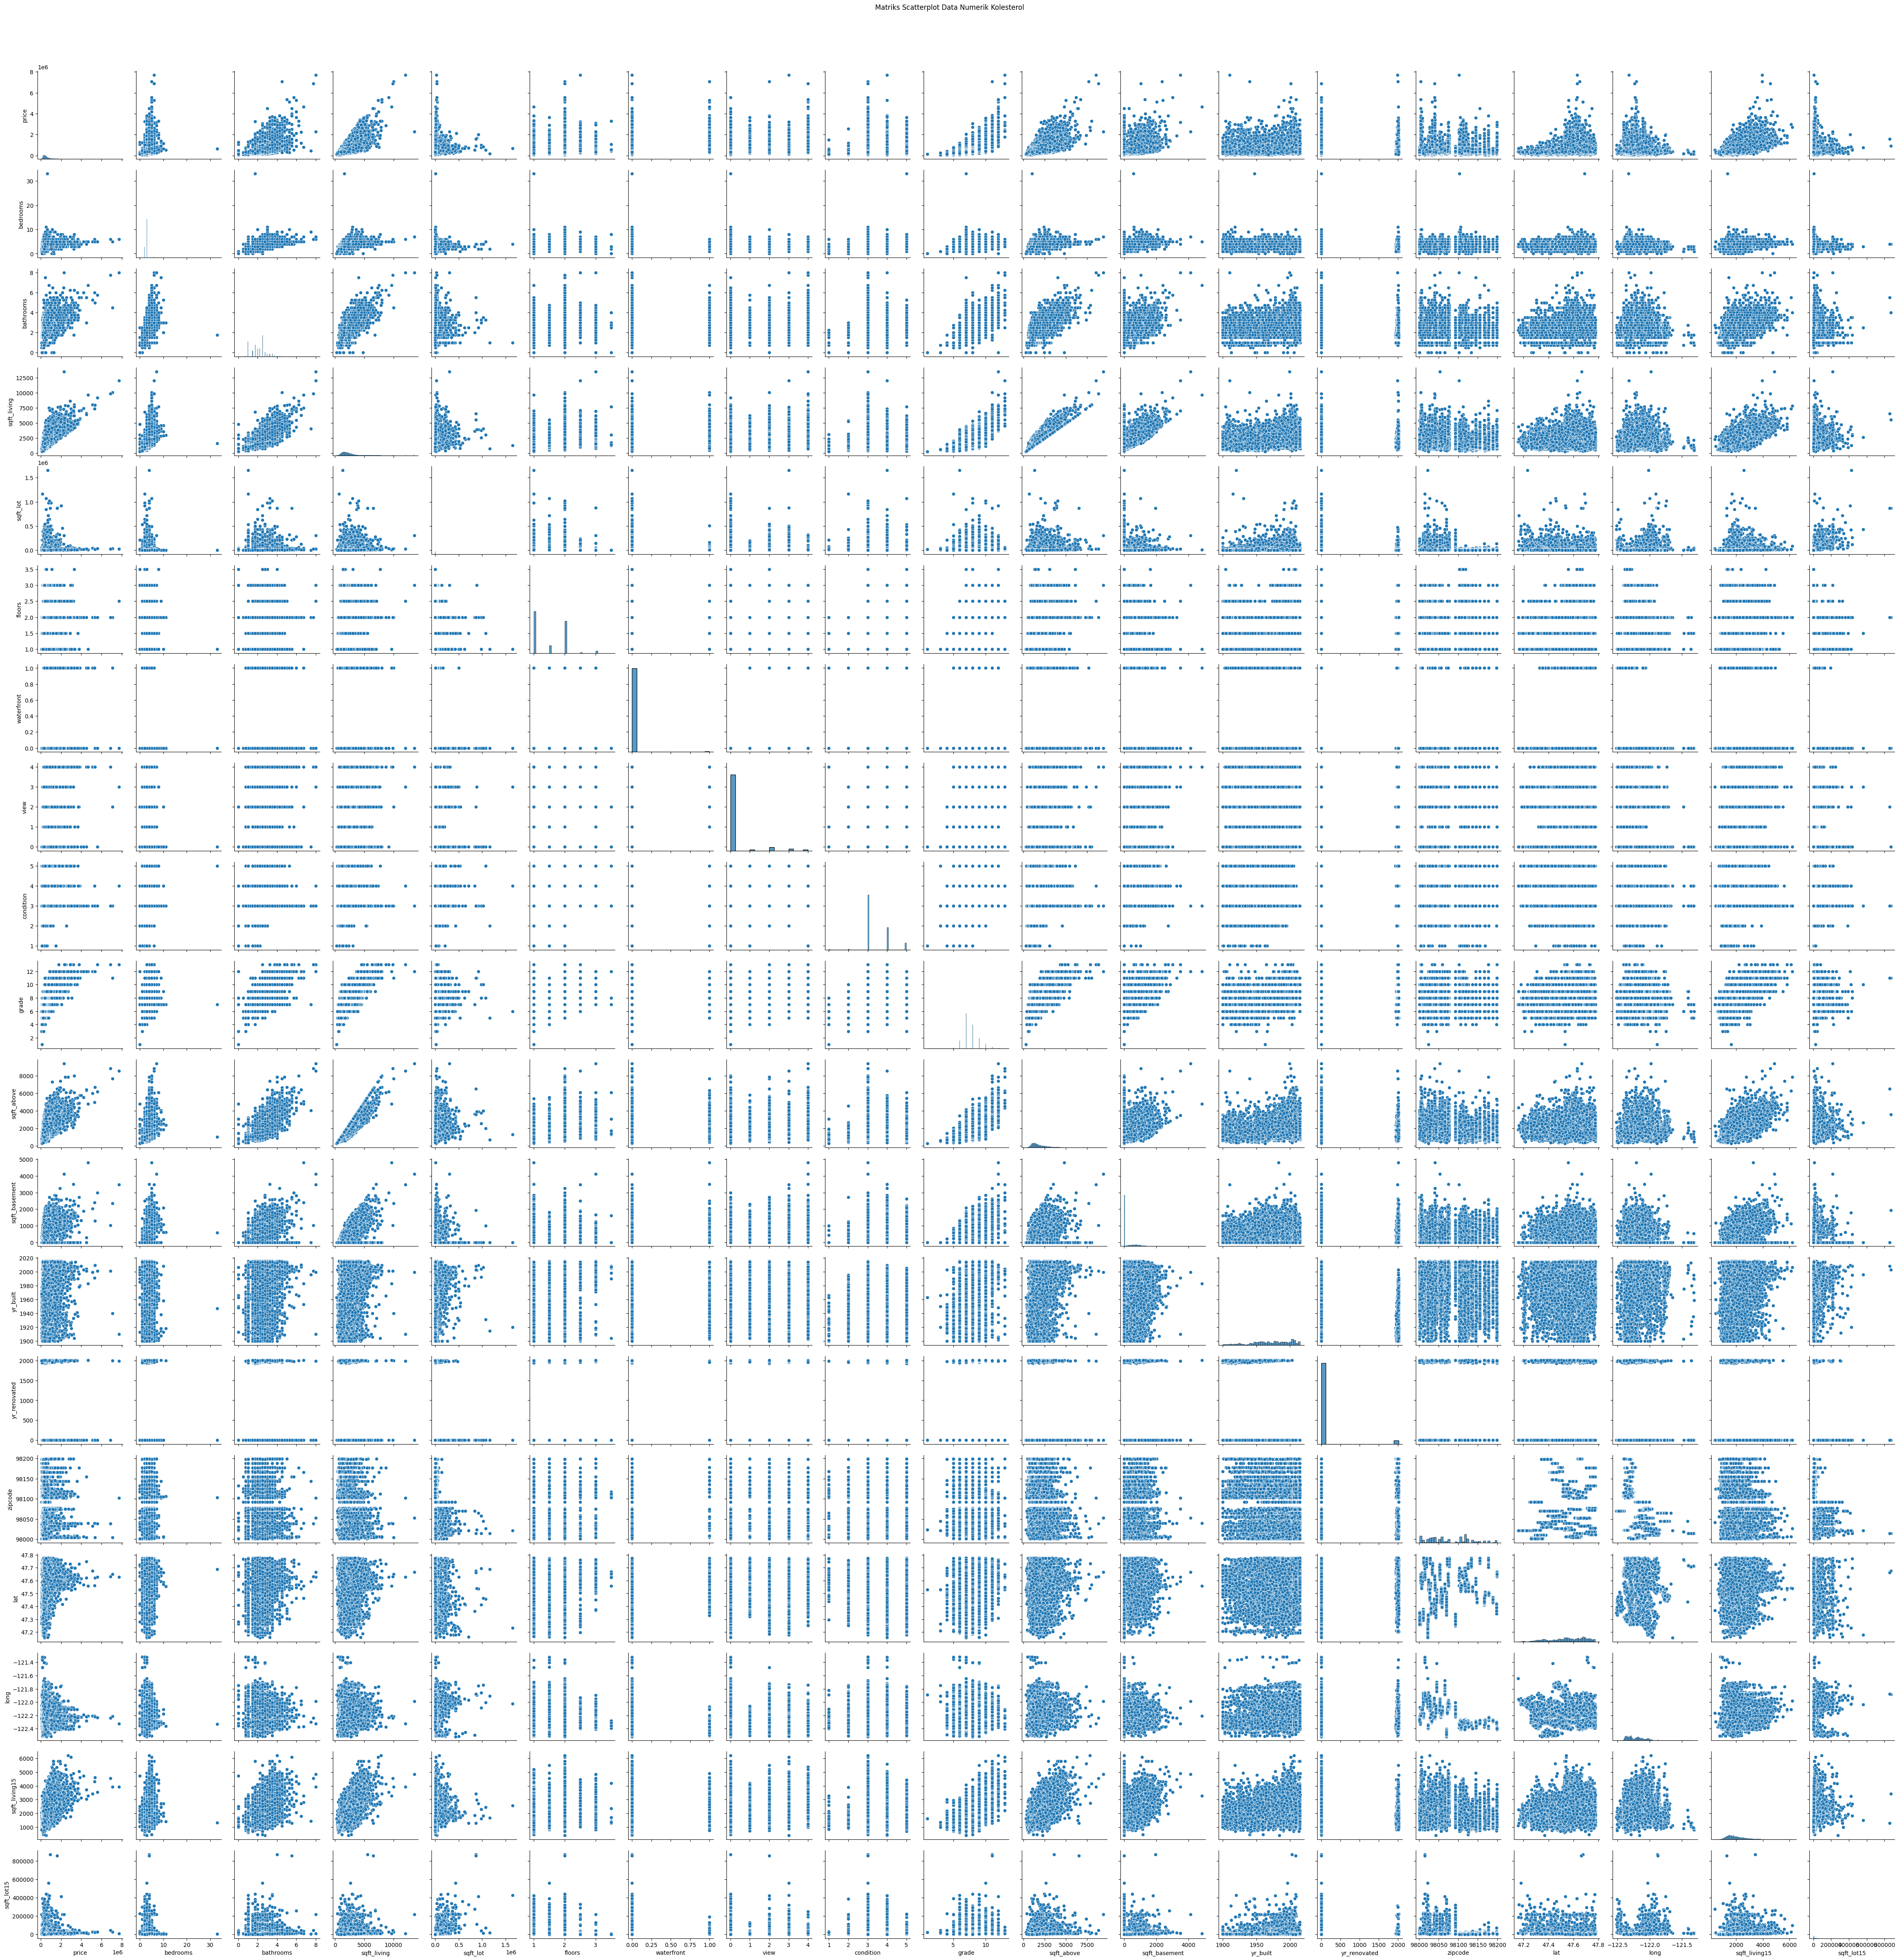

In [21]:
sns.pairplot(datafix)
plt.suptitle("Matriks Scatterplot Data Numerik Kolesterol", y=1.02)
plt.show()

In [24]:
correlation_matrix = datafix.corr(method="pearson")
print("Korelasi Pearson:\n", correlation_matrix)

Korelasi Pearson:
                   price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_base

In [26]:
X_num = X 
R2 = {}

for col in X_num.columns:
    model = LinearRegression()
    X_col = X_num[[col]]  
    model.fit(X_col, y)
    y_pred = model.predict(X_col)
    R2[col] = r2_score(y, y_pred)

R2_df = pd.DataFrame([R2])
print("R-Squared values:\n", R2_df)

R-Squared values:
    bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  \
0  0.095079   0.275769     0.492853  0.008039  0.065943    0.070953  0.157842   

   condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.001322  0.445468    0.366712       0.104857  0.002917      0.015986   

    zipcode       lat      long  sqft_living15  sqft_lot15  
0  0.002831  0.094251  0.000468       0.342668    0.006798  


# Model Regresi

In [27]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
formula = "price ~ " + " + ".join([col for col in datafix.columns if col != "price"])
model = smf.ols(formula=formula, data=datafix).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:32:24   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.69e+06   2.93e+06      2.282

In [33]:
exclude_cols = ["price", "floors"] 

formula = "price ~ " + " + ".join([col for col in datafix.columns if col not in exclude_cols])

model = smf.ols(formula=formula, data=datafix).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3145.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:34:14   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.741e+06   2.89e+06      1.989

# Uji Overall

In [34]:
print("Uji F (Overall Significance Test)")
print(f"F-statistic: {model.fvalue:.4f}, p-value: {model.f_pvalue:.4f}\n")

Uji F (Overall Significance Test)
F-statistic: 3144.9081, p-value: 0.0000



# Uji Parsial Konstanta

In [36]:
print("\nNilai Konstanta (Intercept):")
print(f"{model.params.Intercept:.4f}")


Nilai Konstanta (Intercept):
5741362.5305


In [37]:
intercept_t = model.tvalues["Intercept"]
intercept_p = model.pvalues["Intercept"]

print("Uji t untuk Konstanta (Intercept):")
print(f"T-statistic: {intercept_t:.4f}")
print(f"P-value: {intercept_p:.4f}")

Uji t untuk Konstanta (Intercept):
T-statistic: 1.9887
P-value: 0.0467


In [38]:
alpha = 0.05  # Tingkat signifikansi
if intercept_p < alpha:
    print("Konstanta secara signifikan berbeda dari nol (berpengaruh signifikan).")
else:
    print("Konstanta tidak signifikan (tidak berbeda secara statistik dari nol).")

Konstanta secara signifikan berbeda dari nol (berpengaruh signifikan).


# Uji Parsial Koefisien

In [35]:
print("Uji t (Partial Test for Each Coefficient)")
print(model.pvalues) 

Uji t (Partial Test for Each Coefficient)
Intercept         4.674199e-02
bedrooms          1.547462e-79
bathrooms         6.294212e-42
sqft_living       0.000000e+00
sqft_lot          8.223174e-03
waterfront       4.321567e-241
view             1.953311e-133
condition         1.038447e-28
grade             0.000000e+00
sqft_above       2.952513e-255
sqft_basement     1.349499e-54
yr_built         1.460332e-283
yr_renovated      3.317639e-08
zipcode           1.529001e-68
lat               0.000000e+00
long              2.817205e-61
sqft_living15     9.567473e-10
sqft_lot15        1.231228e-07
dtype: float64


# Model Regresi

$$
\hat{price} = \beta_0 + \beta_1 \cdot \text{bedrooms} + \beta_2 \cdot \text{bathrooms} + \beta_3 \cdot \text{sqft\_living} + \beta_4 \cdot \text{sqft\_lot} $$
$$ + \beta_5 \cdot \text{waterfront} + \beta_6 \cdot \text{view} + \beta_7 \cdot \text{condition} + \beta_8 \cdot \text{grade} + \beta_9 \cdot \text{sqft\_above} + \beta_{10} $$
$$ \cdot \text{sqft\_basement} + \beta_{11} \cdot \text{yr\_built} + \beta_{12} \cdot \text{yr\_renovated} + \beta_{13} \cdot \text{zipcode} + \beta_{14} \cdot \text{lat} + $$
$$\beta_{15} \cdot \text{long} + \beta_{16} \cdot \text{sqft\_living15} + \beta_{17} \cdot \text{sqft\_lot15} + \epsilon
$$

| Variabel        | p-value          | Signifikansi (\(\alpha = 0.05\)) |
|----------------|-----------------|---------------------------------|
| Intercept      | 4.674199e-02     | **Signifikan** (\(< 0.05\))     |
| bedrooms       | 1.547462e-79     | **Signifikan** (\(< 0.05\))     |
| bathrooms      | 6.294212e-42     | **Signifikan** (\(< 0.05\))     |
| sqft_living    | 0.000000e+00     | **Signifikan** (\(< 0.05\))     |
| sqft_lot       | 8.223174e-03     | **Signifikan** (\(< 0.05\))     |
| waterfront     | 4.321567e-241    | **Signifikan** (\(< 0.05\))     |
| view          | 1.953311e-133    | **Signifikan** (\(< 0.05\))     |
| condition      | 1.038447e-28     | **Signifikan** (\(< 0.05\))     |
| grade          | 0.000000e+00     | **Signifikan** (\(< 0.05\))     |
| sqft_above     | 2.952513e-255    | **Signifikan** (\(< 0.05\))     |
| sqft_basement  | 1.349499e-54     | **Signifikan** (\(< 0.05\))     |
| yr_built       | 1.460332e-283    | **Signifikan** (\(< 0.05\))     |
| yr_renovated   | 3.317639e-08     | **Signifikan** (\(< 0.05\))     |
| zipcode        | 1.529001e-68     | **Signifikan** (\(< 0.05\))     |
| lat            | 0.000000e+00     | **Signifikan** (\(< 0.05\))     |
| long           | 2.817205e-61     | **Signifikan** (\(< 0.05\))     |
| sqft_living15  | 9.567473e-10     | **Signifikan** (\(< 0.05\))     |
| sqft_lot15     | 1.231228e-07     | **Signifikan** (\(< 0.05\))     |

- Semua variabel dalam model ini memiliki p-value **lebih kecil dari 0.05**, sehingga **semua variabel signifikan secara statistik** terhadap `price`.  
- Model ini dapat digunakan untuk memprediksi harga (`price`) berdasarkan faktor-faktor yang ada. 

# Diagnostic Checking

## Variabel Independen Bersifat Tetap
Pada kasus ini, asumsi ini terpenuhi.
## Linearitas Variabel Dependen dengan Setiap Variabel Independen
Tepenuhi
## Normalitas Residu

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21613.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: W = 0.7974, p-value = 0.0000
Kolmogorov-Smirnov Test: D = 0.1107, p-value = 0.0000


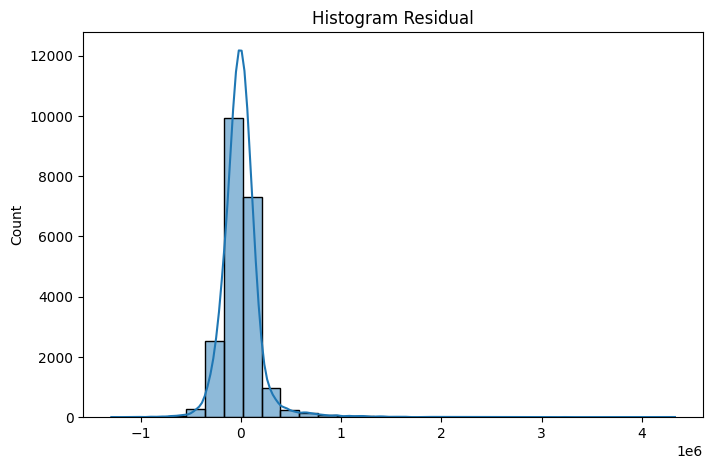

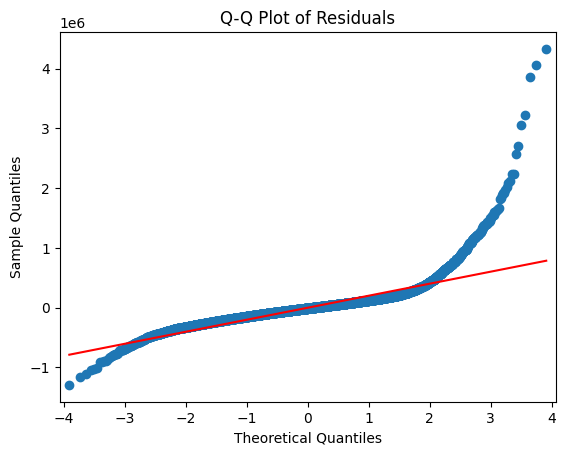

In [39]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

residuals = model.resid

shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: W = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

ks_test = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f"Kolmogorov-Smirnov Test: D = {ks_test.statistic:.4f}, p-value = {ks_test.pvalue:.4f}")

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram Residual")
plt.show()

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


Breusch-Pagan Test: Chi2 = 2801.3662, p-value = 0.0000


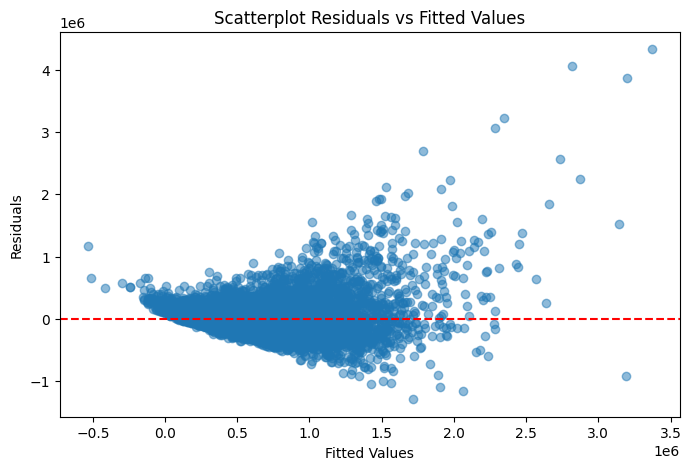

In [40]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan Test: Chi2 = {bp_test[0]:.4f}, p-value = {bp_test[1]:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Scatterplot Residuals vs Fitted Values")
plt.show()


In [41]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

Durbin-Watson Statistic: 1.9901


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = datafix.drop(columns=["price", "floors"])  # Sesuaikan variabel yang ingin digunakan
X = sm.add_constant(X)  # Tambahkan intercept

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         Variable           VIF
0           const  4.447086e+06
1        bedrooms  1.650836e+00
2       bathrooms  3.124278e+00
3     sqft_living           inf
4        sqft_lot  2.101503e+00
5      waterfront  1.203752e+00
6            view  1.434339e+00
7       condition  1.245479e+00
8           grade  3.390557e+00
9      sqft_above           inf
10  sqft_basement           inf
11       yr_built  2.315424e+00
12   yr_renovated  1.147325e+00
13        zipcode  1.647680e+00
14            lat  1.172532e+00
15           long  1.812200e+00
16  sqft_living15  2.942773e+00
17     sqft_lot15  2.133044e+00


# Alternatif Model

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import pandas as pd
dataset = pd.read_csv("D:/SEMESTER 4/Komstat II/kc_house_data.csv")
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [47]:
dataset = dataset.drop(['id','date'], axis = 1)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


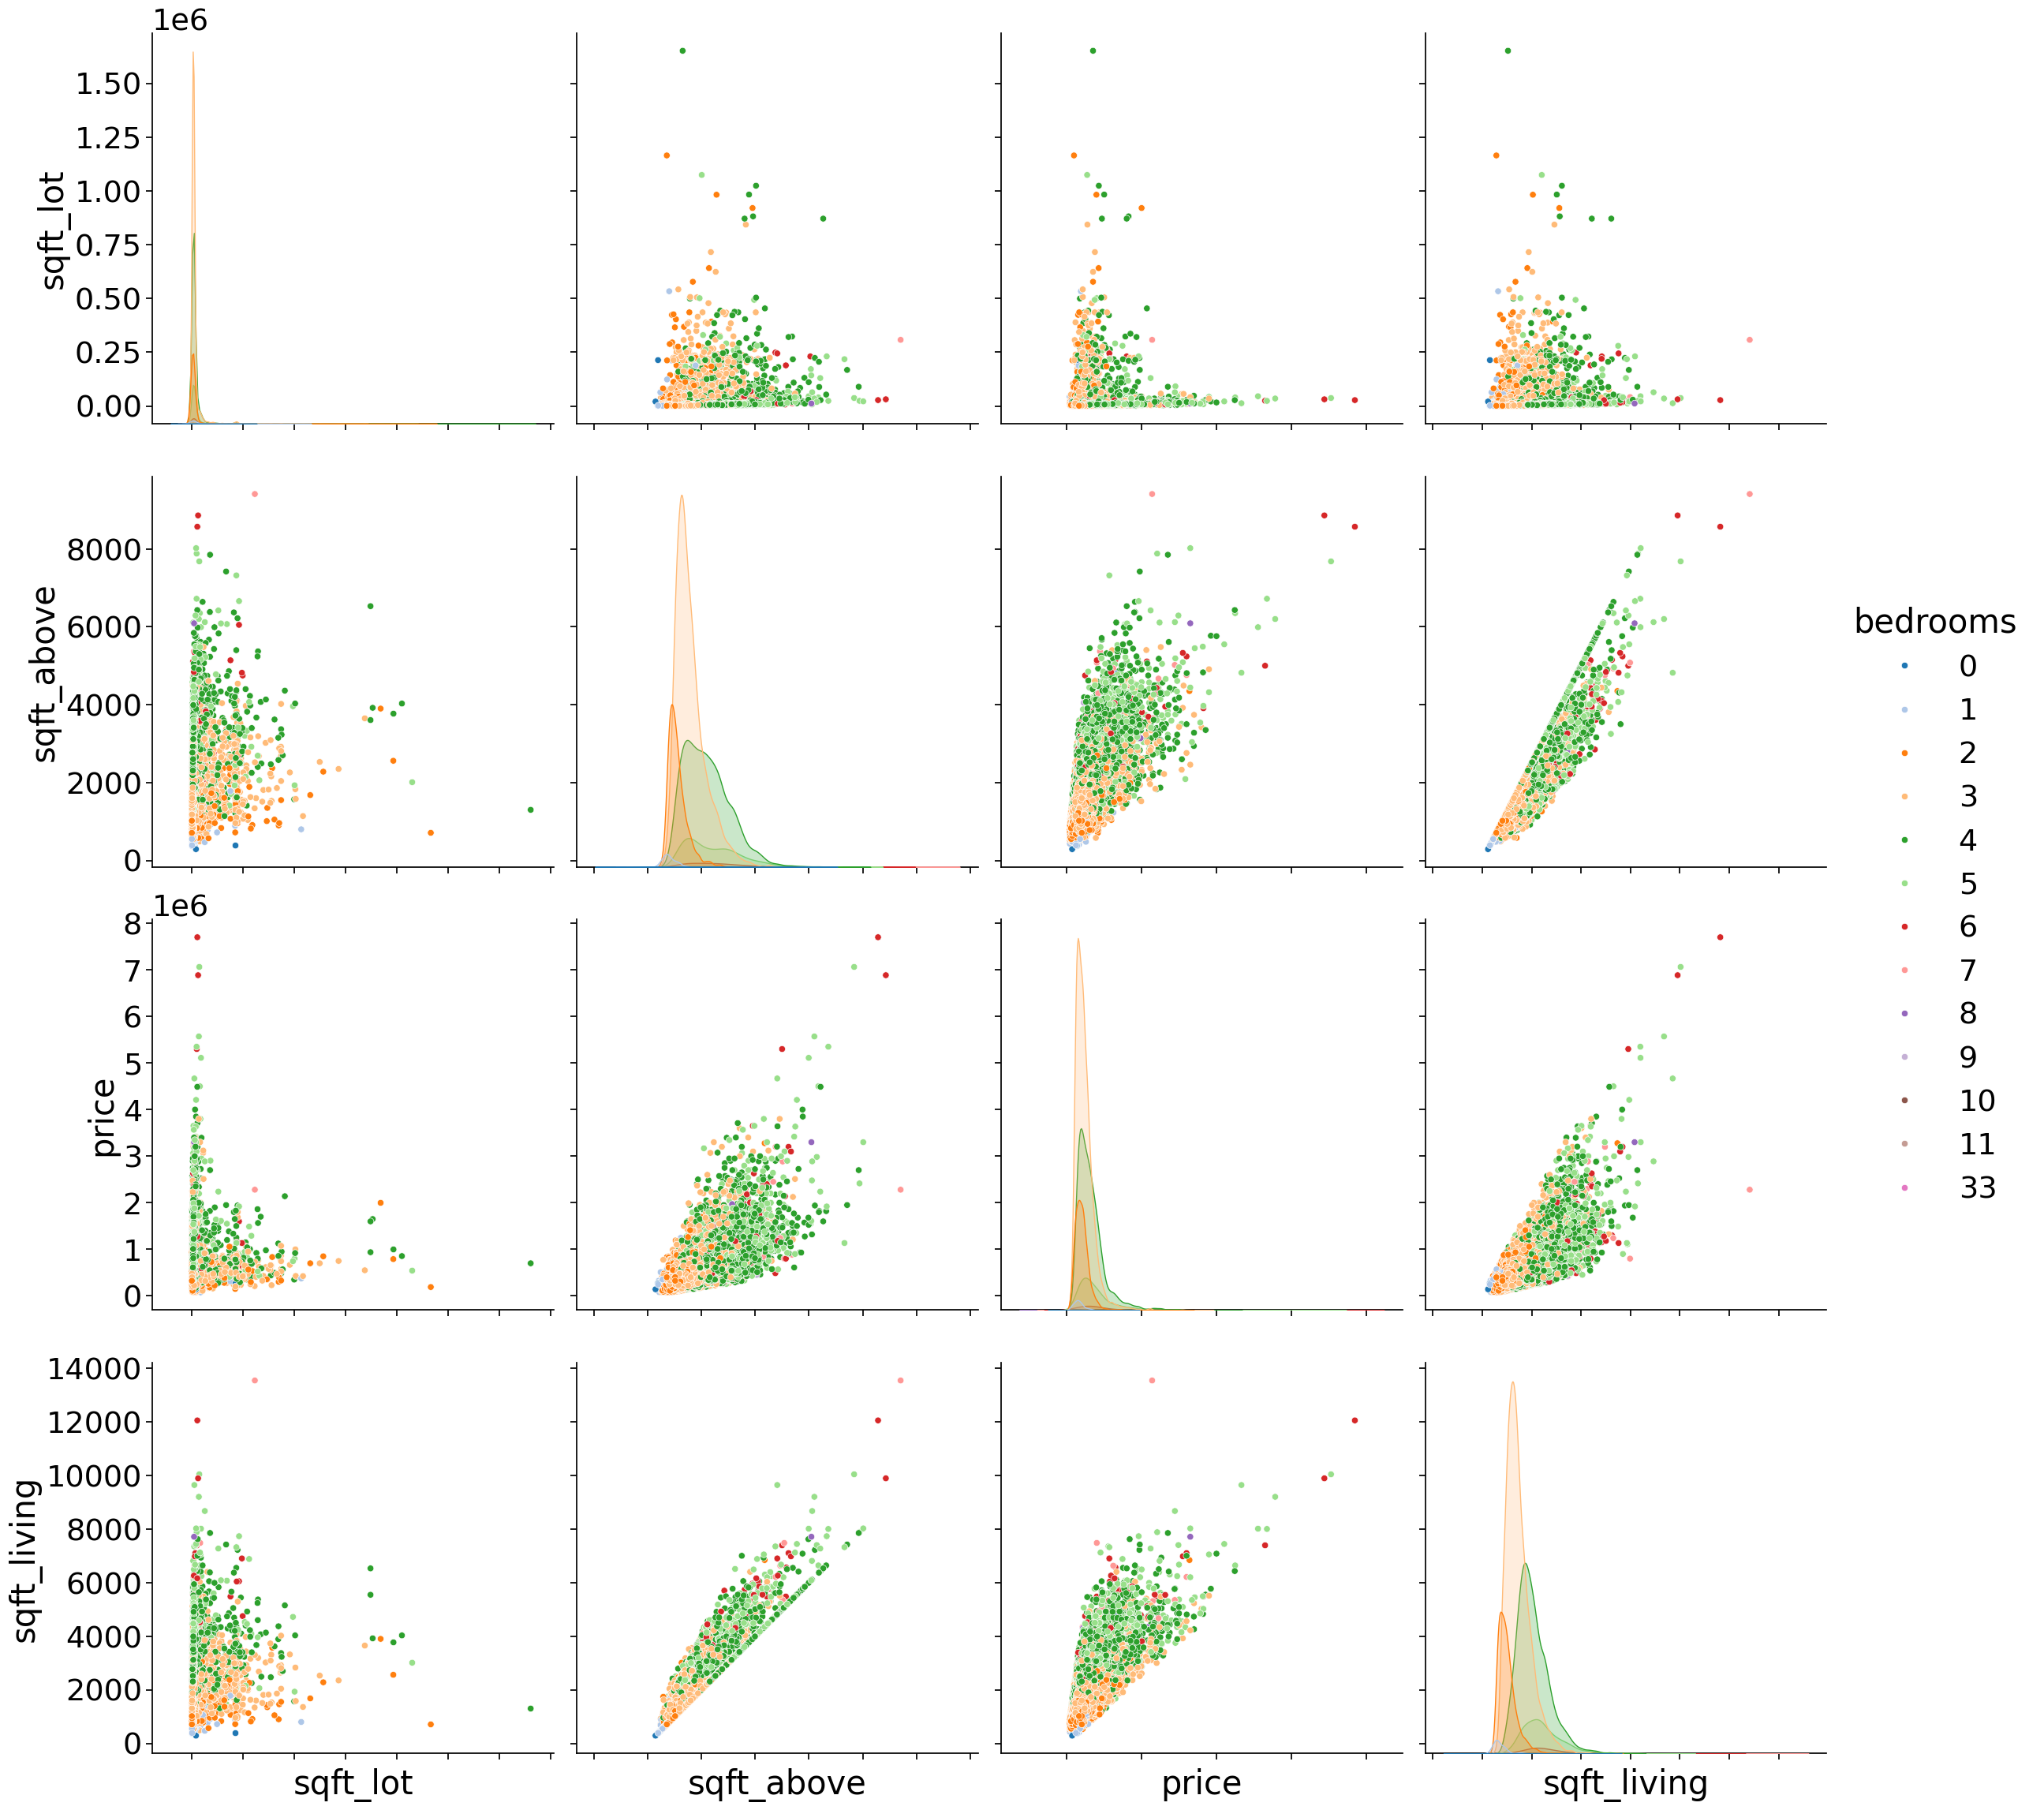

In [48]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [51]:
from sklearn.model_selection import train_test_split


In [54]:
from sklearn.model_selection import train_test_split  # ✅ Ganti modul lama dengan yang baru

X = dataset.iloc[:, 1:].values  # Ambil variabel independen
y = dataset.iloc[:, 0].values   # Ambil variabel dependen

# Pisahkan dataset menjadi training & testing (misalnya 67%-33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [57]:
import statsmodels.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((21613,19)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17]]
X_Modeled = backwardElimination(X_opt, SL)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                        0.00
Time:                        00:01:09   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Conclusion